collection

In [18]:
import json
import matplotlib.pyplot as plt
%matplotlib inline
import praw

create reddit application

In [19]:
redditApi = praw.Reddit(client_id='pz0DTf90DoZvZKHuVBKkZQ',
                        client_secret='0kuxYEviX3ErH0LTnqje1vzrKcYd6g',
                        user_agent='meeeeho')

capture reddit posts using concatenation of subs

In [20]:
subreddit = "buildapc+MechanicalKeyboards"
targetSub = redditApi.subreddit(subreddit)

# store post titles
title_list = []
submissions = targetSub.new(limit=10)
for post in submissions:
        title_list.append(post.title)

print(title_list)

['Installing a New GPU, will I need to uninstall any drivers if I have never had a GPU before?', 'Need some advice regarding GPU purchase', 'Please help: M2 SSD keeps disconnecting during stress (mainly during games)', 'Upgrade Help for 1440p Gaming', "Please help me with these issues I've been having with my pc.", 'PCIE cables', 'My mechanical keyboard with water damage', 'old disk to new pc', 'Brand new Desktop has issues w/ multitasking after adding 48GB RAM', 'm.2 not working']


In [21]:
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()

for post_title in title_list:
    tokenizer.tokenize(post_title)

reddit voting

In [22]:
subreddit = "buildapc+MechanicalKeyboards"

targetSub = redditApi.subreddit(subreddit)
submissions = targetSub.new(limit=20)
for post in submissions:
    print(post.title, post.author)

Installing a New GPU, will I need to uninstall any drivers if I have never had a GPU before? DjDawber
Need some advice regarding GPU purchase dovedown-
Please help: M2 SSD keeps disconnecting during stress (mainly during games) Dodzik112
Upgrade Help for 1440p Gaming amon1992
Please help me with these issues I've been having with my pc. Axayushx
PCIE cables Fun-Can-6114
My mechanical keyboard with water damage lynn9702
old disk to new pc al3100
Brand new Desktop has issues w/ multitasking after adding 48GB RAM Im_Not_Mr_Fantastic
m.2 not working pastafan420
A case that fits a 4080 neatly? RedditIsAnnoying1234
Looking for a gaming GPU that supports Thunderbolt monitor + peripherals. Does it exist? joe0418
HP x16PCIEXP J41 Duben123
Clay keyboard MOD Skarface08
Anything to improve in this gaming/ml build? OLRevan
Help picking the ultimate AIO (for me)? Mjt8
planning my first build, are there any problems? kerrit24
Ryzen 5700G too much for In Win Chopin Pro? qualia9
Is this a good build? :

In [23]:
def recursive_node_adder(g, comment, parent_author):
    '''
    recursively process comments and add them to the graph
    '''
    
    # check if node in graph
    if comment.author not in g.nodes:
        g.add_node(comment.author)
        
    # create edge between comment author and parent author
    g.add_edge(comment.author, parent_author)

    # iterate through the comments
    for reply in comment.replies.list():
        if isinstance(reply, praw.models.MoreComments):
            continue
            
        # recursively process this reply
        recursive_node_adder(g, reply, comment.author)

network and graph creation

In [24]:
import networkx as nx
g = nx.Graph()

populate graph

In [25]:
subreddit = "buildapc+MechanicalKeyboards"

breadthCommentCount = 20

targetSub = redditApi.subreddit(subreddit)

submissions = targetSub.hot(limit=20)

for post in submissions:
    print (post.author, "-", post.title)
    
    # check if node is in graph
    if post.author not in g.nodes:
        g.add_node(post.author)
    
    post.comment_limit = breadthCommentCount
    
    # fetch top few comments
    for comment in post.comments.list():
        
        # skip MoreComment objects (which don't have authors)
        if isinstance(comment, praw.models.MoreComments):
            continue
        
        # recursively process this reply
        recursive_node_adder(g, comment, post.author)

SpikedSynapse - [GB] IFK Classic Magic - First time using Blender
Potential-Sector554 - anyone else just hate how big GPUs are getting?
elzZza - Finished new build
tacticaltsundere - [GB] Keytok Back into the Game Keycap Set
PM_ME_UR_RIG - Found one of you clicky bastards at Penn State!
LouiiTwigs - 11 year old brother types 78wpm with 2 fingers!
dodongski - So much for my endgame board. My cat now owns it
febust - Neson 700e x GMK Strikers R2
No-Faithlessness-35 - Is upgrading from 8gb ram to 16gb ram, worth it?
CompanyAdditional504 - if heaven had bgm ☁️
marocu - When you spill coffee on your keeb 😭
wembee - [Artisan] Satay Artisan Keycap - zomgkey
idneverknow - Dz60 build! 🪵🌳
boohootooweeaboo - 'Vilebloom' Planck Plushie
More_Salt_7499 - My first build: kbd67 lite
joselitux - Santa is da best: keychain v8 + akko lavender
Vivid_Ad3449 - A Botanical Board for the Cold Nights!
cinnabonbunbunny - made a keyboard for my cats, they still use mine instead
Izayoizz - Definitely not somethin

In [26]:
nx.write_graphml(g, "reddit.graphml", prettyprint=False)

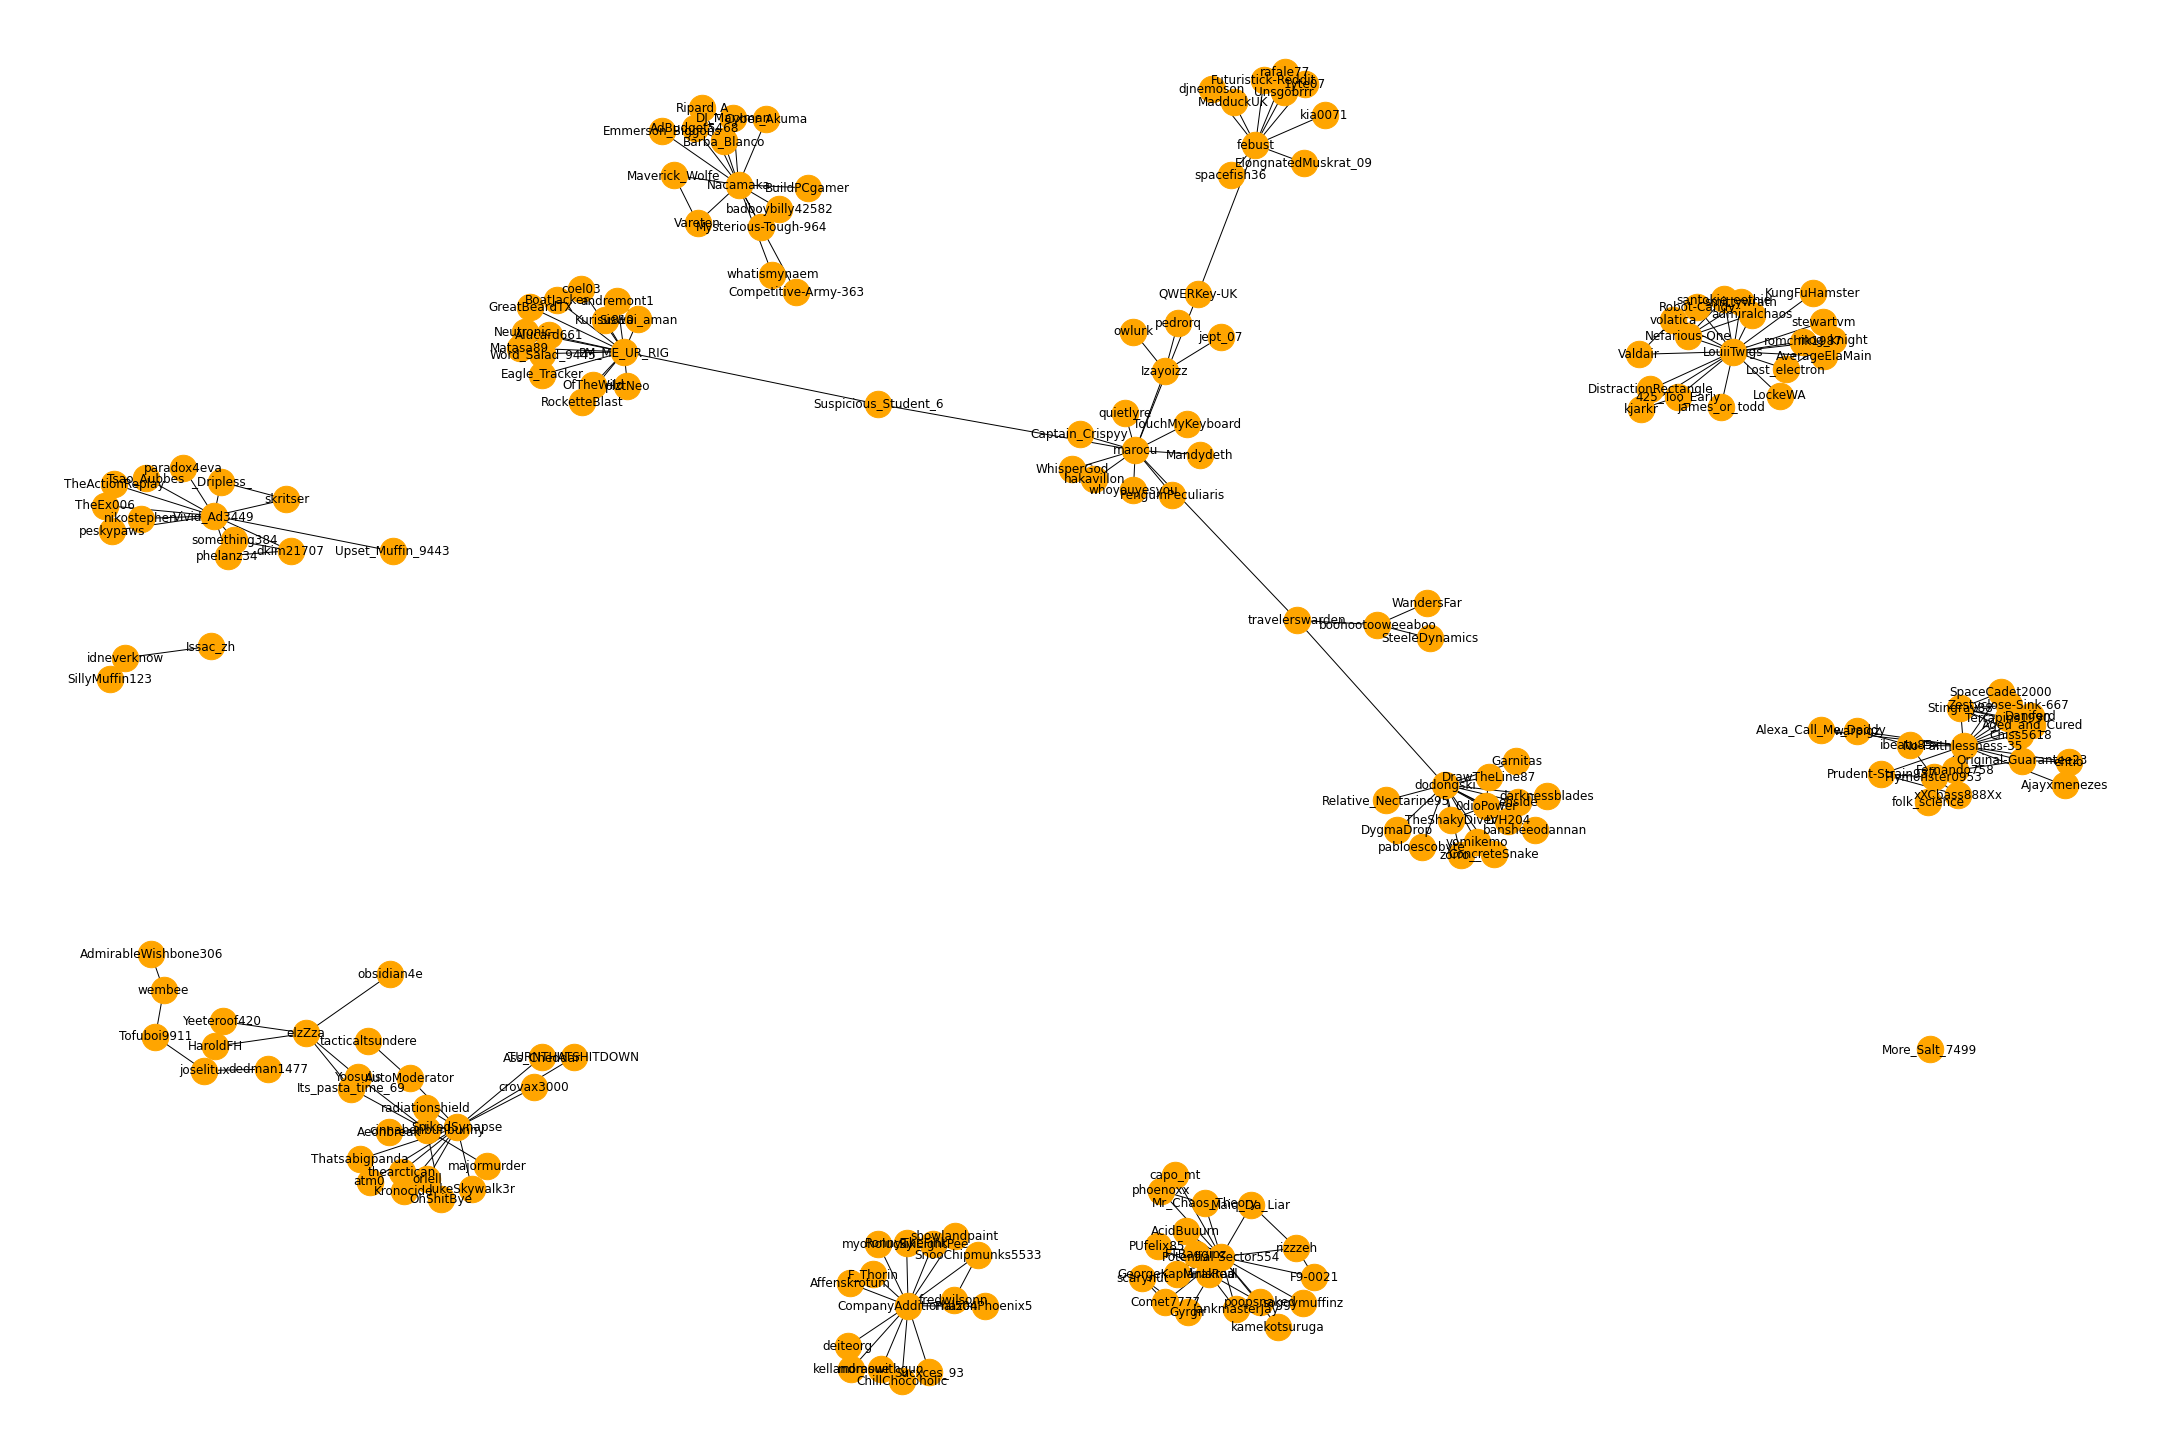

In [27]:
# spring layout algorithm
pos = nx.spring_layout(g, scale=200, iterations=100, k=0.2)

# draw the graph with node labels
plt.figure(3,figsize=(30,20)) 
nx.draw(g,pos, with_labels = True, node_size = 700, node_color = 'orange')
plt.show()